In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.feature_selection import r_regression, f_regression
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib.gridspec import GridSpec
from scipy.stats import f
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
directory = 'data/graphs'
import os
if not os.path.exists(directory):
    os.makedirs(directory)

In [10]:
df = pd.read_csv("data/ModifiedSummaryByNeighborhood.csv") 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   er_visits     168 non-null    int64
 1   air_quality   168 non-null    int64
 2   asbestos      168 non-null    int64
 3   electrical    168 non-null    int64
 4   food          168 non-null    int64
 5   garbage       168 non-null    int64
 6   mold          168 non-null    int64
 7   rodent        168 non-null    int64
 8   smoking       168 non-null    int64
 9   felonies      168 non-null    int64
 10  misdemeanors  168 non-null    int64
 11  violations    168 non-null    int64
dtypes: int64(12)
memory usage: 15.9 KB


#### Calculate feature correlations and display a correlation heat-map

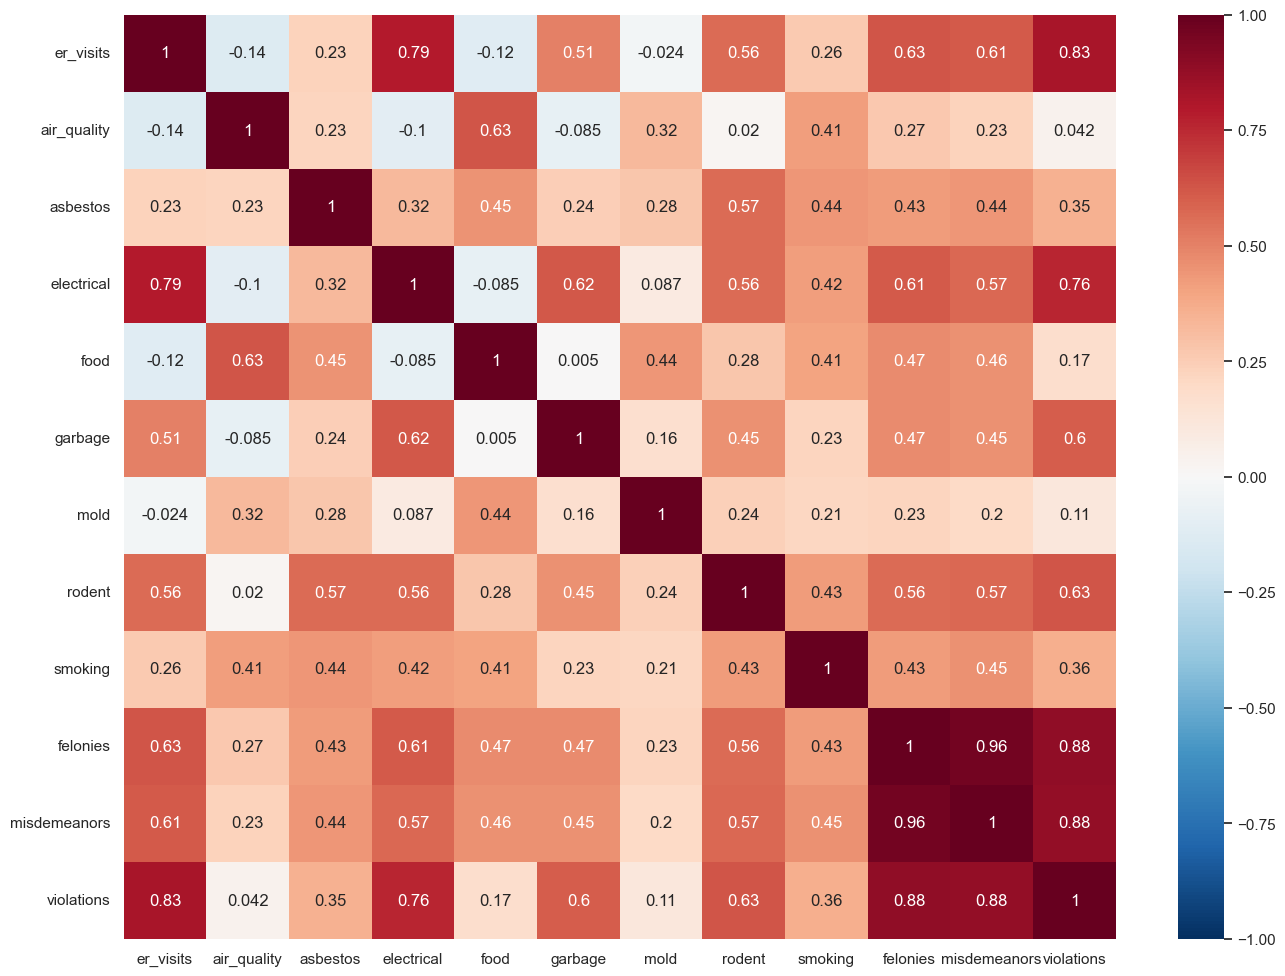

In [12]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
corr = df.corr(method='pearson')
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns_plot = sns.heatmap(
    corr,        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);


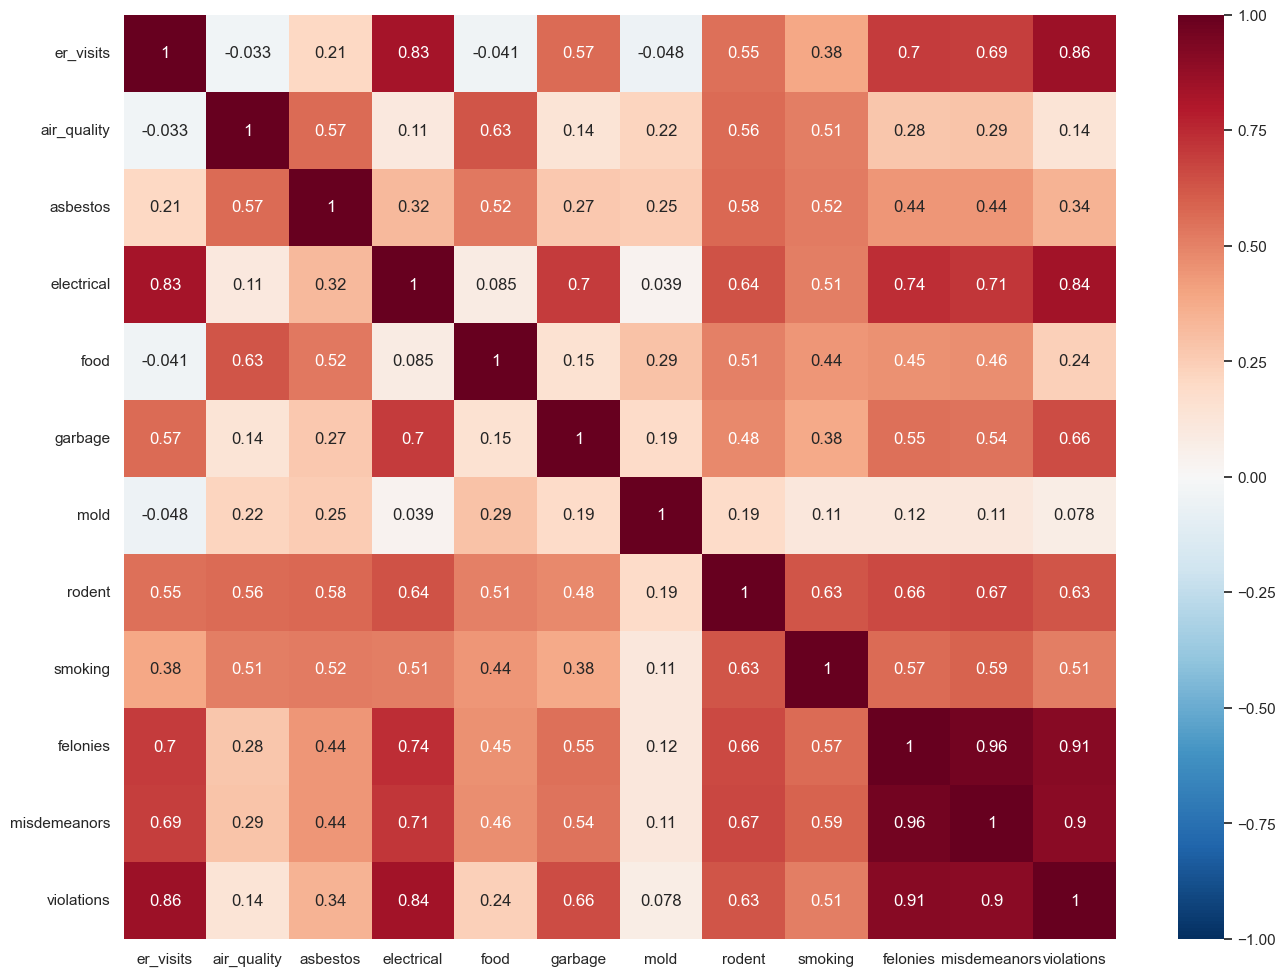

In [5]:
corr = df.corr(method='spearman')
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns_plot = sns.heatmap(
    corr,        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

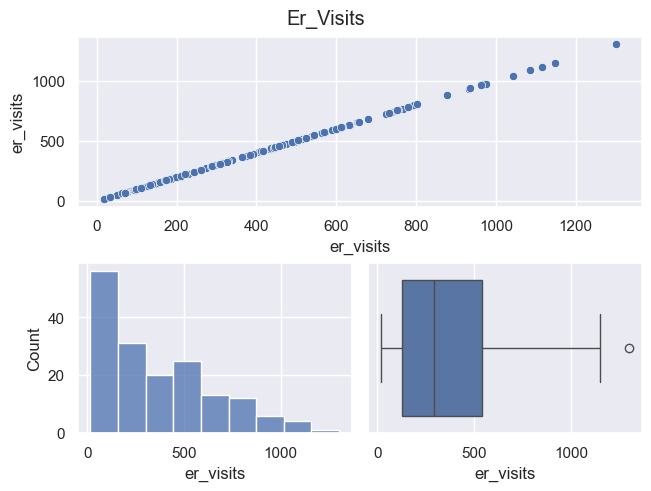

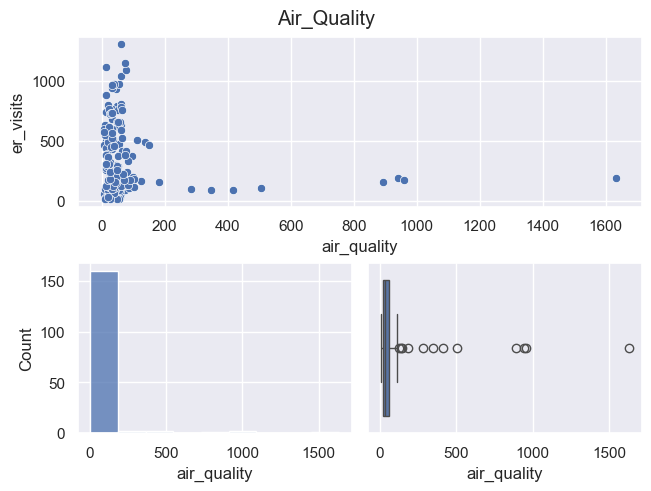

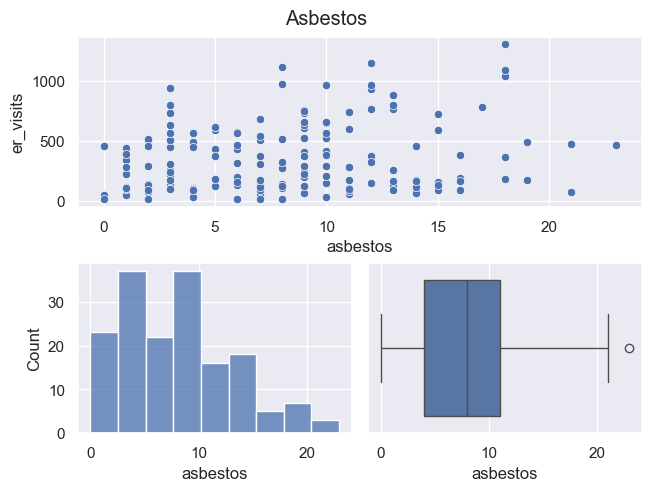

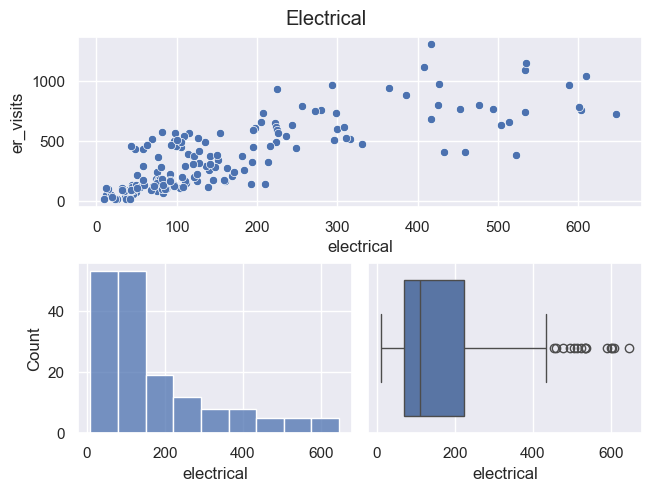

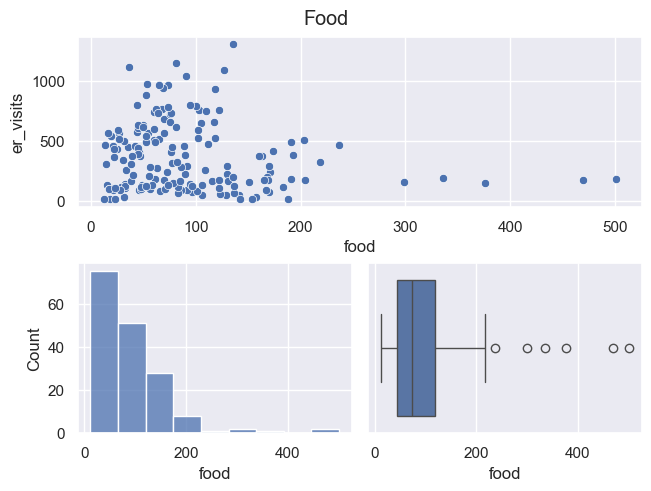

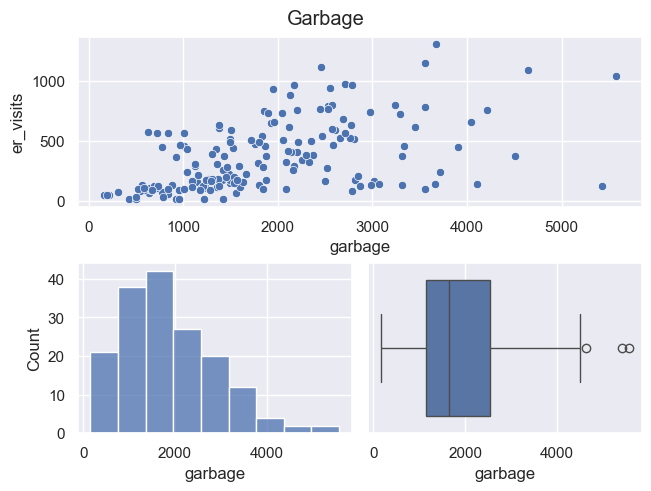

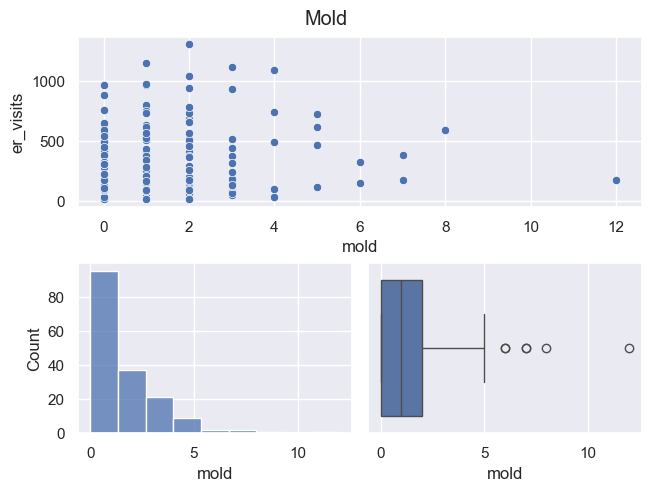

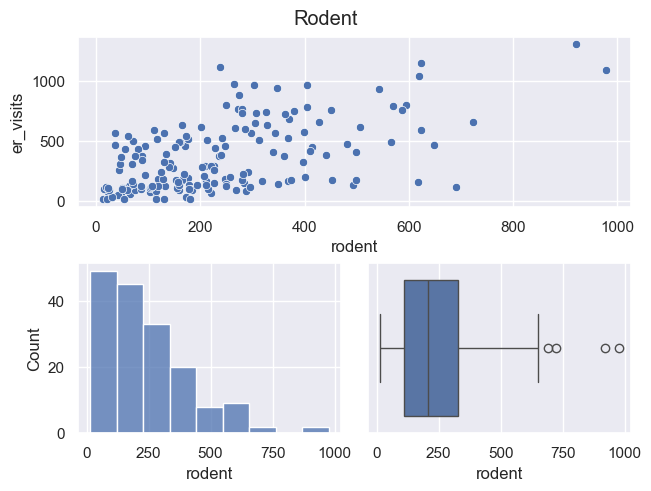

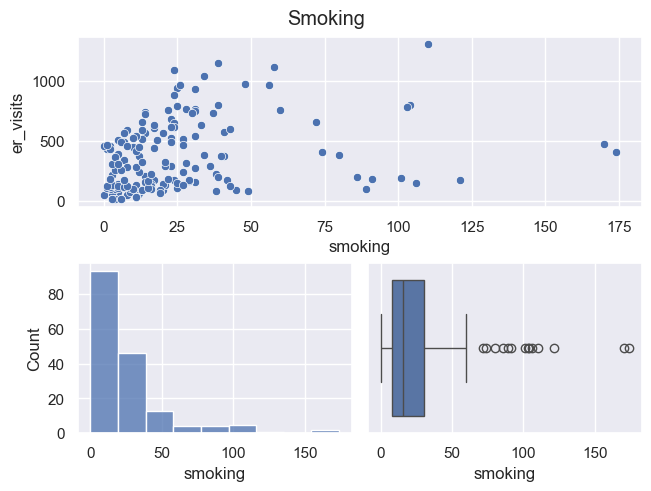

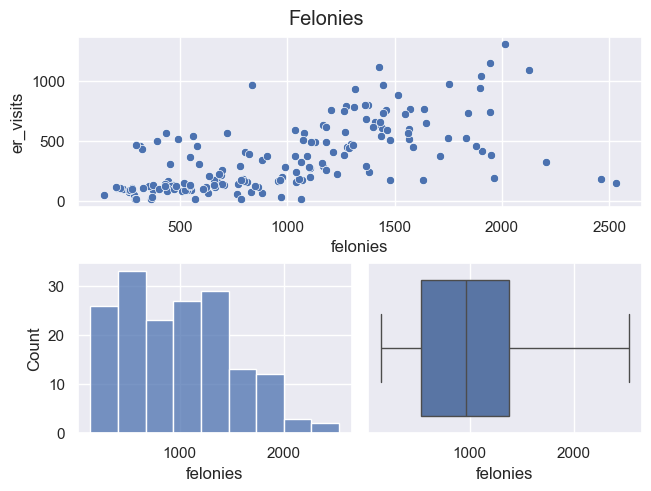

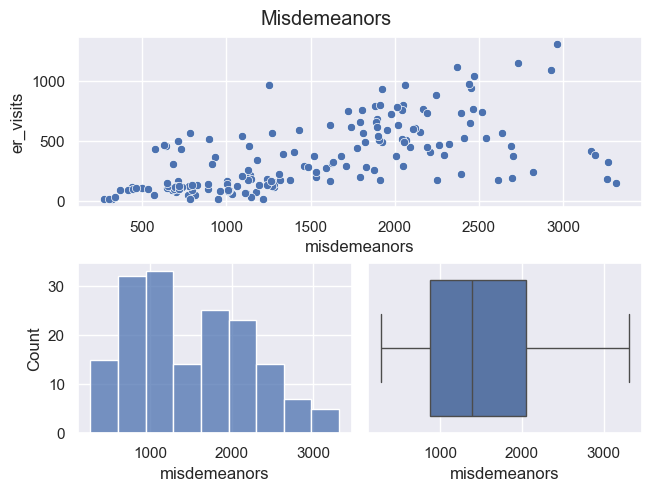

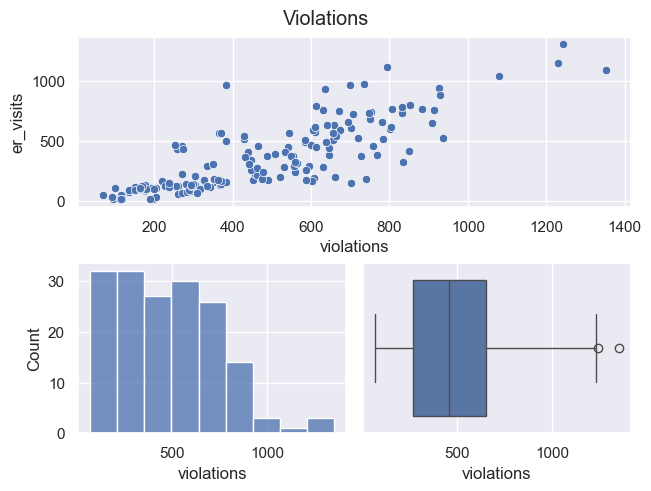

In [13]:
columns = df.columns
for idx in range(len(columns)):
    x_value = columns[idx]
    t_value = columns[idx].title()
    fig = plt.figure(constrained_layout=True)
    gs = GridSpec(2, 2, figure=fig)
    # create sub plots as grid
    ax1 = fig.add_subplot(gs[0, :])
    sns.scatterplot(data=df,x=x_value, y='er_visits')
    ax2 = fig.add_subplot(gs[1, 0])
    sns.histplot(x=x_value,data=df,bins=9)
    ax3 = fig.add_subplot(gs[1, 1])
    sns.boxplot(data=df,x=x_value,orient='h')
 
    # depict illustration
    fig.suptitle(t_value)
    fig.savefig('data/graphs/' + x_value + '.png', format='png')
    print('\n')

In [14]:
abs_corr = df.corr()['er_visits'].apply(lambda x: abs(x))
abs_corr.sort_values(ascending=False, inplace=True)
abs_corr.drop(index='er_visits', axis=1, inplace=True)

In [15]:
abs_corr

violations      0.826234
electrical      0.793777
felonies        0.628128
misdemeanors    0.612845
rodent          0.563376
garbage         0.507184
smoking         0.262010
asbestos        0.230972
air_quality     0.136577
food            0.124846
mold            0.023706
Name: er_visits, dtype: float64